In [1]:
%matplotlib widget

# Fitting a function to data

ToDos
* make function with kwargs so that user can change the function and it 
* move fitting part the functions module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit
from matplotlib.widgets import Slider, Button
import ipywidgets as widgets
from IPython.display import display
import random
import functions
from functions import *

## Simulating data with noise using a function and random noise 

interactive(children=(FloatSlider(value=5.0, description='noise level', max=50.0, readout_format='.0f', step=1…

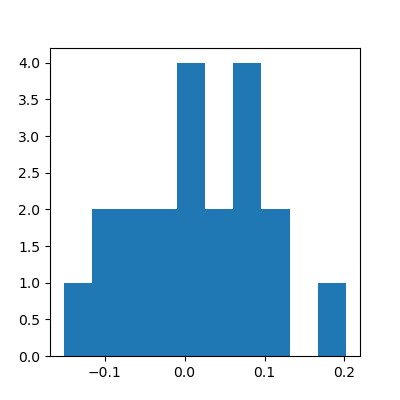

In [11]:
# make the random numbers predictable
np.random.seed(46)
# define the function to fit
def func(x, a, b):
    '''a function to fit to the data
    a: amplitude
    b: Kd
    x: independent variable'''
    return a * x/(x+b)

# set the parameters for the function
a = 2
b = 1
# make sliders for the noise level and the number of points and get the sliders and the plot
# show_plot is defined in functions.py

n_slider, noise_level_slider = show_plot(a, b, func)


## Fitting data with noise to a function

In [13]:
# set initial values for the parameters for the fit
a_init = 1
b_init = 1

# get the values for n and noise_level from the sliders
n = n_slider.value
noise_level = noise_level_slider.value

# generate the data
x = np.linspace(0, 10,n)
y = func(x,a,b)
# generate the fake data with noise
noise = np.random.normal(loc=0.0, scale= y.max()/100* noise_level, size=len(x)) # numpy.random
y_exp = y + noise

# generate the sliders for the initial values of the parameters
a_init_slider = widgets.FloatLogSlider(value=1, min =np.log(0.5), max = 2, step =0.1 , description='a_init', readout_format='.2f')
b_init_slider = widgets.FloatLogSlider(value=1, min =np.log(0.5), max = 2, step =0.1 , description='b_init', readout_format='.2f')
# generate the plot using widgets.interactive and display it using display from IPython.display
# perform_fit2 is defined in functions.py
plot_widget = widgets.interactive(perform_fit2,  a_init=a_init_slider, b_init=b_init_slider, func=widgets.fixed(func), x=widgets.fixed(x), y_exp = widgets.fixed(y_exp), continuous_update=False)
display(plot_widget)


interactive(children=(FloatLogSlider(value=1.0, description='a_init', max=2.0, min=-0.6931471805599453, readou…

## Task
* make a function out of the code cell below
* parameters are function, a_init, b_init


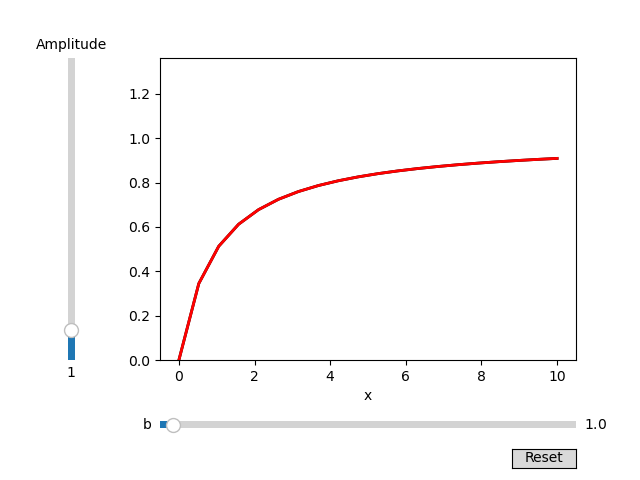

In [9]:
init_a = 1
init_b = 1
# Make a horizontal slider to control the frequency.
fig, ax = plt.subplots()

line_start = ax.plot(x, func(x, init_a, init_b), lw=2)
# color line in black
line_start[0].set_color('black')
line,  = ax.plot(x, func(x, init_a, init_b), lw=2)  
# color line in red
line.set_color('red')
ax.set_xlabel('x')
ax.set_ylim(0, func(x, init_a, init_b).max()*1.5)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)


# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
b_slider = Slider(
    ax=axfreq,
    label='b',
    valmin=0.1,
    valmax=30,
    valinit=init_b,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_a,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(func(x, amp_slider.val, b_slider.val))
    # change the y-axis limits to the new data limits
    # ax.set_ylim(0, func(x, amp_slider.val, b_slider.val).max()*1.1)
    fig.canvas.draw_idle()


# register the update function with each slider
b_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    b_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

In [7]:
print ("done")

done


## Watermark

In [5]:
%load_ext watermark
%watermark -v
%watermark --conda
%watermark --iversions
%watermark -v -m -p numpy,scipy,matplotlib,pandas,watermark
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.4.0

conda environment: base

scipy     : 1.9.1
pandas    : 1.4.4
ipywidgets: 7.6.5
numpy     : 1.21.5
matplotlib: 3.5.2

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.4.0

numpy     : 1.21.5
scipy     : 1.9.1
matplotlib: 3.5.2
pandas    : 1.4.4
watermark : 2.3.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit

Last updated: Mon Mar 27 2023 17:59:48Mitteleuropäische Sommerzeit

